# Sheet 5
by Michaela and Elias

## Task 1. Fixed Points, Stability, and Bifurcations

### 1.1 
*Find the fixed points of the system. Visualize these in a graph. Are they stable?*

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root_scalar

In [18]:
def map(x, theta = -2.5,w = 7):
    return(w * 1 / (1 + np.exp(- x)) + theta)


In [19]:
f = lambda x: x - map(x)
fixpoint = fsolve(f, x0 = 3)
print(fixpoint)

[4.41647135]


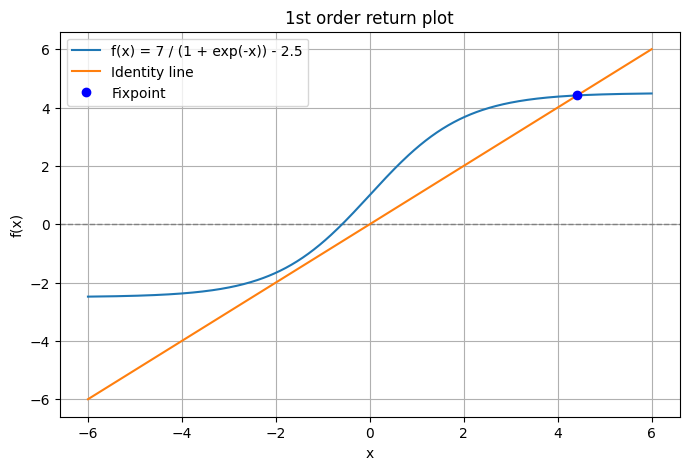

In [20]:
x_vals = np.linspace(-6, 6, 400)
y_vals = map(x_vals)
w = 7

# Plotting
plt.figure(figsize=(8, 5))
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # horizontal line at y=0
plt.plot(x_vals, y_vals, label=f"f(x) = {w} / (1 + exp(-x)) - 2.5")
plt.plot(range(-6,7), range(-6,7), label=f"Identity line")
plt.plot(fixpoint, map(fixpoint), 'o', color='blue', label="Fixpoint")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("1st order return plot")
plt.legend()
plt.grid(True)
plt.show()

The fixpoint is stable (at least locally). No matter the initial value it seems that the system will converge to the fixpoint. This is seen by following the cobweb obtained by starting at a $x_0$. Furthermore the derivative of the recursive model defining the system is given by
$$f'(x_t) = \frac{w}{\exp(x_t)+\exp(-x_t) + 2}$$
And we know that the fixpoint is locally stable as long as the derivative in the point is smaller than 1 - which is the case for the fixpoint found above. 


### 1.2
*For $w = 7$, plot the bifurcation graph as a function of $\theta \in [−10, 0]$. Include both stable and unstable objects. How does the system change its dynamical properties as $\theta$ is varied within this range*

/tmp/ipykernel_2640/1051039706.py:2: RuntimeWarning: overflow encountered in exp
  return(w * 1 / (1 + np.exp(- x)) + theta)


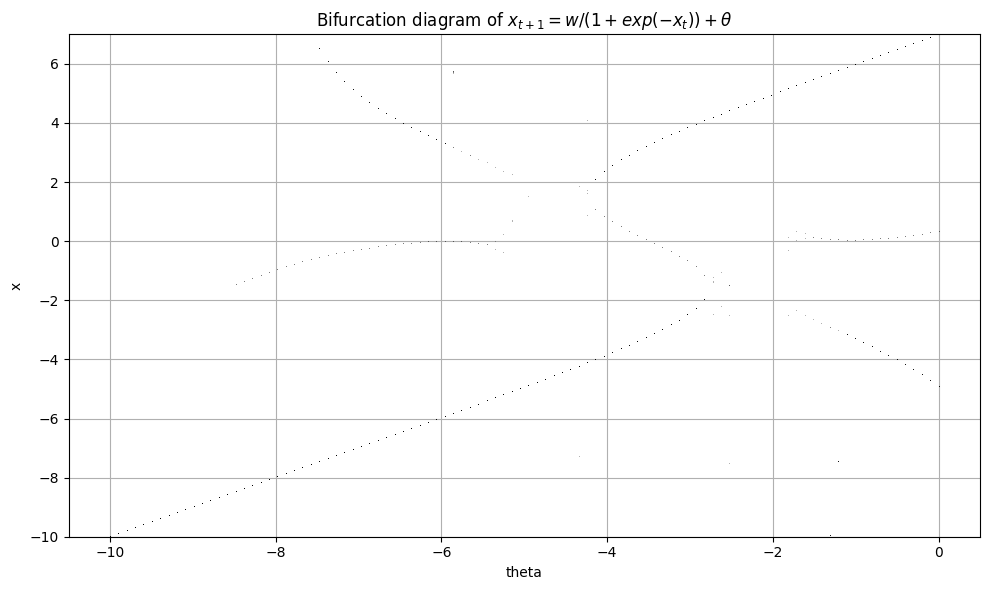

In [27]:
def fixpoint_eq(x,theta):
    return map(x,theta) - x

theta_vals = np.linspace(-10, 0, 100)
n_transient = 30                # discard these iterations
n_iter = 100                   # plot these iterations after transient
start_values = np.linspace(-10,10,20)

# Prepare figure
plt.figure(figsize=(10, 6))
for x in start_values:
    # Loop over theta values
    for theta in theta_vals:
        # Iterate to get close to attractor
       
       x_vals = root_scalar(fixpoint_eq,method="newton",x0=x,args=(theta))
        # Plot points: one vertical line of x-values for this theta
       plt.plot(theta, x_vals.root, ',k', alpha=0.3)

# Labels and show
plt.title(r"Bifurcation diagram of $x_{t+1} = w / (1 + exp(-x_t)) + \theta$")
plt.ylim((-10,7))
plt.xlabel("theta")
plt.ylabel("x")
plt.grid(True)
plt.tight_layout()
plt.show()

## Task 2. The Logistic Map

### 2.1
*Prove that, for 0 ≤ xn ≤ 1 and 0 ≤ r ≤ 4, we have 0 ≤ f(xt) ≤ 1.*


$f(x_n)$ is defined as
$$f(x_n) = rx_n(1-x_n) = r (x_n - x_n^2)$$
Note that $x_n \in [0,1] \Rightarrow x_n^2 \leq x_n$. Therefore we have $x_n - x_n^2 \geq 0$ and $r \geq 0$ implying 
$$f(x_n) = r (x_n - x_n^2) \geq 0$$
Establishing the lower bound. For the upper bound note that the function $0 \leq x_n - x_n^2$ for $x_n \in [0,1]$ is concave and has an optimum in $x_n = 0.5$ thus
$$f(x_n) = r (x_n - x_n^2) \leq r \cdot 0.5 \leq 4 \cdot 0.25 = 1$$

### 2.2

*Given a trajectory $x_1, x_2, \ldots, x_T$, here’s a recipe to make a cobweb plot of a map:

1. Plot $(x_1, x_2)$.
2. Connect that point to $(x_2, x_2)$.
3. Connect this to $(x_2, x_3)$, and so forth.

Starting from some $x_1 \in (0, 1)$, plot a cobweb plot for $r = 0.5$, $1.5$, $2.5$, $3.5$, and $3.9$ with 30 steps.*

In [17]:
class Logic_map:
    
    def __init__(self, func):
        self.func = func

    def calculate_trajectory(self,x0,r,steps):
        trajectory = [x0]
        xn = x0
        for i in range(steps-1):
            xnn = self.func(xn,r)
            xn = xnn
            trajectory.append(xn)
        return np.array(trajectory)
        

        
    def plot_cobweb(self, x0, r, steps, color, label):
        
        # Calculate trajectory
        x = self.calculate_trajectory(x0,r,steps)
        plt.scatter(x[0], x[1], color=color, label=label)
        # Plot cobweb
        for i in range(len(x) - 2):
            plt.scatter(x[i], x[i+1], color=color)
            plt.plot([x[i], x[i+1]], [x[i+1], x[i+1]], color=color)
            plt.plot([x[i+1], x[i+1]], [x[i+1], x[i+2]], color=color)
        plt.scatter(x[-2], x[-1], color=color)
        
    
    def calculate_trajectory_end_points(self, list_r, steps):
        
        # Calculate trajectory end points
        trajectory_ends = []
        for r in list_r:
            x0 = np.random.rand(1000)
            trajectory_ends.append(self.calculate_trajectory(x0, r, steps)[-1])
        
        return trajectory_ends
        
    def plot_trajectory_end_points(self, rs, trajectory_ends):
        
        # Reshape array of rs
        rs = np.repeat(rs, 1000).reshape(-1, 1000)
        
        plt.scatter(rs, trajectory_ends, s=0.5)
        plt.xlabel('r')
        plt.ylabel(r'$x_{100}$')

In [10]:
def log_map(x, r):
    return r*x*(1-x)

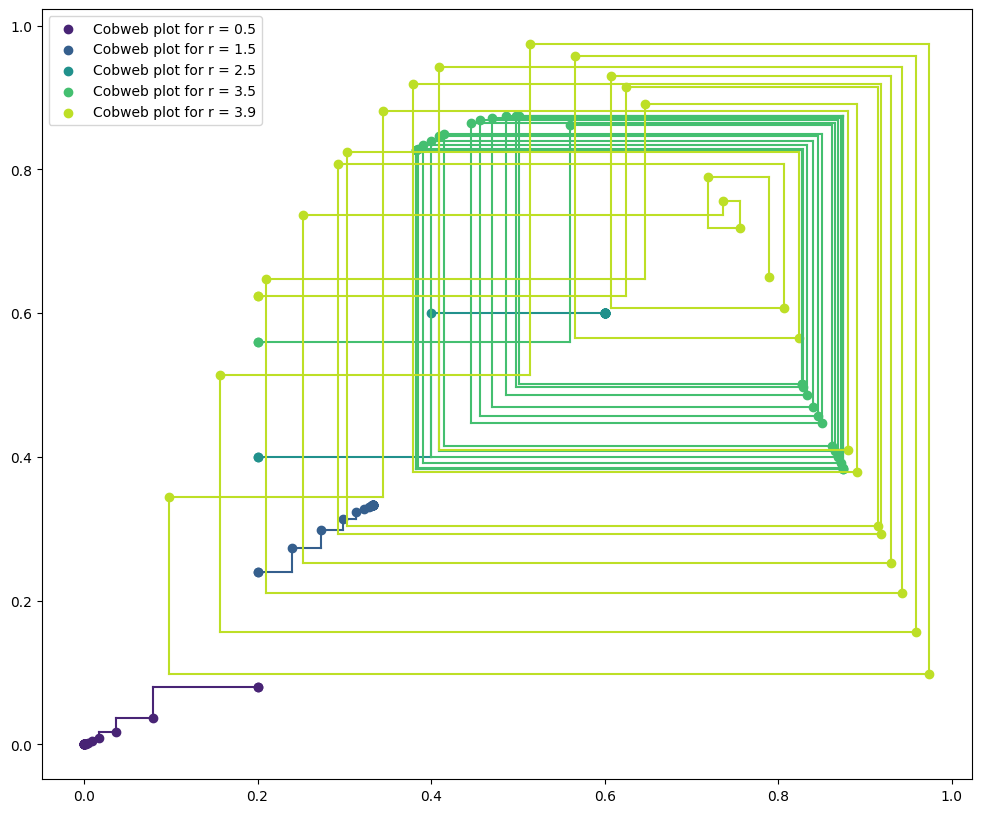

In [11]:
lmap = Logic_map(log_map)

# Plot cobweb for different rs
rs = [0.5, 1.5, 2.5, 3.5, 3.9]
cmap = plt.get_cmap('viridis')
colors = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(12, 10))
for i, r in enumerate(rs):
    lmap.plot_cobweb(0.2, r, 30, color=cmap(colors[i]), label=f'Cobweb plot for r = {r}')

plt.legend()
plt.show()

## 2.3 
*Show that the logistic map has a cycle of order 2 for $r > 3$. Use that a 2-cycle requires  
$f(q) = p$ and $f(p) = q$.  
What is the stability of the 2-cycle? Does the stability change for some $r > 3$?*


Let $f(q) = p$ and $f(p) = q$. This implies 
$$rq(1-q) = p$$
and 
$$rp(1-p) = q$$
Substituting the expression for $q$ into the expression of $p$ we obtain
$$r^2p(1-p)(1-rp(1-p)) = p$$
Which is equivalent to
$$-rp^3 + 2rp^2 - (1+r) p + 1 - 1/r^2 = 0$$
Which is a cubic equation. The cubic equation always has at least one real solution, implying that there is always 2-cycle for the logistic map, and specifically for $r > 3$. We can find the solutions by help of python. Below we define the a function to find the solutions of the equation and a function for computing the discriminant. If the discriminant is positive there are 3 solutions, if it is negative there is only 1. 

## 2.4
*Plot only the endpoints of the trajectories according to their
respective r in a 2D-scatter plot.*

In [5]:
# Compute trajectory ends for r-array
rs = np.linspace(0.001, 3.999, 399)
trajectory_ends = lmap.calculate_trajectory_end_points(rs, 100)

In [1]:
# Plot Trajectory ends for r-array
lmap.plot_trajectory_end_points(rs, trajectory_ends)

NameError: name 'lmap' is not defined

## 2.5

In [7]:
# Calculate trajectory ends for new r-array
rs = np.linspace(3.44500, 3.57000, 1250)
trajectory_ends = lmap.calculate_trajectory_end_points(rs, 100)

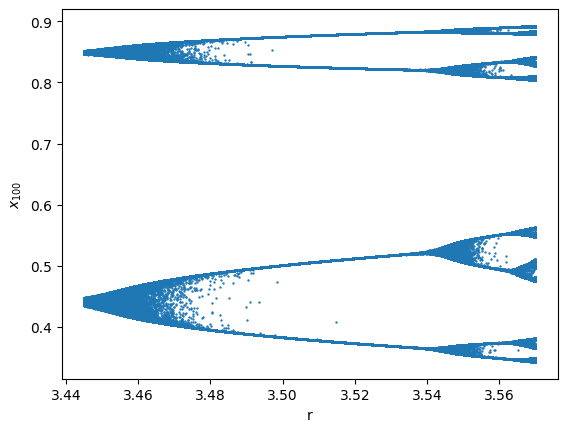

In [8]:
# Plot trajectory ends for new r-array
lmap.plot_trajectory_end_points(rs, trajectory_ends)

For \( r = 3.5 \), there appears to be a cycle of order 4. That means that  
$ f^{4} (x^*) = x^* $  

Also, we have to check that  
$ f^2(x^*) \ne x^* $,  
because what looks like a 4-cycle could also be two disjoint 2-cycles, so we compute the 4 cycle to check:


In [2]:
def f4(x):
    r = 3.52
    return log_map(3.52,log_map(r,log_map(r, log_map(r, x))))

def g(x):
    return f4(x) - x

# Plot g(x) to see where it crosses zero
x_vals = np.linspace(0, 1, 10**6)
g_vals = [g(x) for x in x_vals]

plt.axhline(0, color='gray', linestyle='--')
plt.plot(x_vals, g_vals)
plt.title("g(x) = f(f(f(f(x)))) - x")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.grid(True)
plt.show()

# Use fsolve to find a root near a suspected zero
x0_guess = 0.5
x_root = fsolve(g, x0_guess)[0]

# Check the orbit
x1 = x_root
x2 = log_map(r, x1)
x3 = log_map(r, x2)
x4 = log_map(r, x3)
x5 = log_map(r, x4)

print(f"Found period-4 cycle:\n  x1 = {x1:.6f},\n  x2 = {x2:.6f},\n  x3 = {x3:.6f},\n  x4 = {x4:.6f},\n  x4 = {x5:.6f}")


NameError: name 'np' is not defined

by looking at the values of $x_1,x_2,x_3,x_4$ we can see that ths is in fact a 4 cycle

## 2.6

In [9]:
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks

In [ ]:
mask = rs > 3.44
r_masked = rs[mask]
x_masked = np.array(trajectory_ends)[mask, :]

maxima_ls = []

for i, x in enumerate(x_masked):
    # Reshape for KDE
    x_d = np.linspace(min(x) - 1, max(x) + 1, 1000)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.025).fit(x[:, np.newaxis])
    log_dens = kde.score_samples(x_d)

    # Find maxima
    density_values = np.exp(log_dens)
    peaks, _ = find_peaks(density_values)
    """
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_d[:, 0], density_values, label='KDE')
    plt.scatter(x_d[peaks], density_values[peaks], color='red', zorder=5, label='Maxima')
    plt.title('Kernel Density Estimation with Maxima')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    """
    # Number of maxima
    num_maxima = len(peaks)
    maxima_ls.append(num_maxima)

In [ ]:
plt.plot(r_masked, maxima_ls)

## 2.7)

## 2.8)